# Unit 5 - Financial Planning

In [175]:
import os
import requests
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
import datetime as dt
import pytz

%matplotlib inline

In [176]:
from dotenv import load_dotenv
load_dotenv()

True

# Part 1 - Personal Finance Planner
## Collect Crypto Prices Using the requests library

In [177]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [178]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [179]:
# Fetch current BTC price
btc_request = requests.get(btc_url).json()
btc_price = btc_request["data"]['1']['quotes']['USD']['price']
btc_price

11347.09

In [180]:
# Fetch current ETH price
eth_request = requests.get(eth_url).json()
eth_price = eth_request["data"]['1027']['quotes']['USD']['price']
eth_price

367.82

In [182]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price 
my_btc_value

13616.508

In [183]:
# Compute current value of my crpto
my_eth_value = my_eth * eth_price
my_eth_value

1949.446

In [184]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13616.51
The current value of your 5.3 ETH is $1949.45


In [191]:
crypto = my_btc_value + my_eth_value
crypto

15565.954

## Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [231]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [193]:
# Current amount of shares
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [194]:
print(type("ALPACA_API_KEY"))

<class 'str'>


In [195]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

In [196]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [197]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [232]:
# Get current closing prices for AGG and SPY
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [226]:
df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3591541  348.96   

                                                            
                             high    low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62796942

In [233]:
# Pick AGG and SPY close prices
# df_closing_prices = pd.DataFrame()
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

In [234]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [235]:
agg_share = my_agg * agg_close_price
agg_share

23576.0

In [236]:
spy_share = my_spy * spy_close_price
spy_share

17362.5

In [237]:
shares = agg_share + spy_share
shares

40938.5

## Savings Health Analysis

In [238]:
# Set monthly household income
monthly_income = 12000

In [473]:
# Create savings DataFrame
value_data = {
    "SHARES": [shares],
    "CRYPTO": [crypto],
}
df_savings = pd.DataFrame(value_data)
df_savings.transpose().rename(columns={0: 'AMOUNT'})

,AMOUNT
SHARES,40938.500
CRYPTO,15565.954


In [ ]:
df_savings.plot.pie(y="value_data", title="Stocks & Crypto Composition")

In [519]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [304]:
# Calculate total amount of savings
total_savings = shares + crypto
total_savings

56504.454

In [305]:
# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulation! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print(f"Congratulation! You have reach enough money in your emergency fund")
else:
    print(f"You neeed ${total_savings - emergency_fund} to reach your goal of having emergency fund")

Congratulation! You have enough money in your emergency fund


# Part 2 - Retirement Planning

## Monte Carlo Simulation

In [306]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

In [307]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]

In [308]:
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [309]:
# Display sample data
df_ticker.head()

AGG                                         SPY  \
                             open     high     low   close     volume    open   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588.0  202.83   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942.0  202.50   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562.0  202.85   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723.0  203.61   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244.0  202.98   

                                                                
                             high       low   close     volume  
2015-10-16 00:00:00-04:00  203.29  201.9200  203.14   79323870  
2015-10-19 00:00:00-04:00  203.37  202.1300  203.33   61255929  
2015-10-20 00:00:00-04:00  203.84  202.5471  203.07   60081395  
2015-10-21 00:00:00-04:00  203.79  201.6500  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.8100  205.22  121670959

In [310]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [312]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# Init signature
MCSimulation(
    portfolio_data = df_ticker,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)

In [314]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

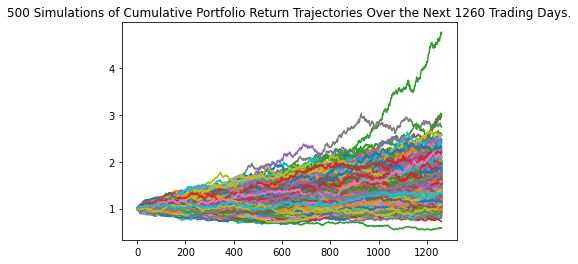

In [315]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

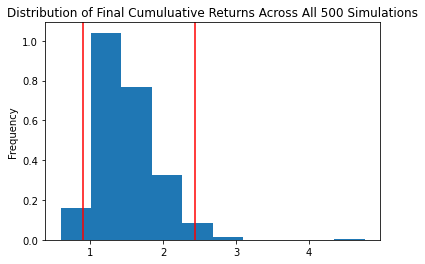

In [316]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

## Retirement Analysis

In [318]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.504754
std               0.405458
min               0.591212
25%               1.231979
50%               1.426011
75%               1.736351
max               4.762588
95% CI Lower      0.899789
95% CI Upper      2.433058
Name: 1260, dtype: float64


## Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [320]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17995.79 and $48661.15


## Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [321]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $26993.68 and $72991.73


# Optional Challenge - Early Retirement

## Five Years Retirement Option

In [356]:
# Configuring a Monte Carlo simulation to forecast five year cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252*1
)

In [357]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open     high     low   close     volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562.0   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723.0   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

In [358]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995799,1.009319,1.004567,0.999121,0.981284,1.000942,0.988564,1.002928,1.005270,1.000558,...,0.997060,0.987547,0.995730,1.006992,1.005380,0.996420,0.990850,1.009500,1.007178,0.992515
2,1.001963,1.009142,1.007549,0.976025,0.981819,1.014793,0.979948,1.008770,1.009396,1.002374,...,0.988936,0.977181,1.010198,0.994988,1.007581,0.999281,0.984754,1.006606,1.004770,1.006540
3,0.998029,1.012522,1.005529,0.990695,0.976336,1.014645,0.990004,1.005100,1.009729,0.994257,...,1.000461,0.976972,1.011956,0.986521,1.012215,0.997675,0.988249,1.007784,1.011724,1.020104
4,1.005557,1.010700,1.001016,0.992263,0.971916,1.014685,0.995377,1.006862,1.000164,0.986089,...,0.998400,0.991839,1.035092,0.992241,1.007766,0.991086,0.985872,1.010717,1.010277,1.015741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.042586,1.108580,1.051667,1.822384,1.232850,1.837081,1.386314,0.855235,1.287253,1.027455,...,1.726476,1.182924,0.949216,1.257009,1.077748,1.502095,2.397652,1.046901,2.329995,2.003500
1257,1.039500,1.108618,1.057814,1.822517,1.237861,1.829207,1.389785,0.865214,1.295977,1.017226,...,1.734469,1.187893,0.952597,1.262683,1.081043,1.490357,2.423549,1.054442,2.342458,2.026859
1258,1.041502,1.093599,1.053853,1.824424,1.240492,1.847457,1.395256,0.871446,1.286277,1.017951,...,1.747574,1.180580,0.952483,1.260810,1.092306,1.490761,2.439752,1.054483,2.369322,2.035049
1259,1.036624,1.104564,1.053070,1.815464,1.243017,1.857719,1.387901,0.875494,1.277619,1.030074,...,1.758161,1.192006,0.945677,1.250131,1.101034,1.492710,2.446772,1.060976,2.354715,2.001128


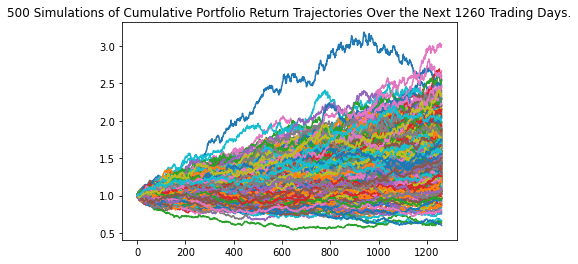

In [359]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

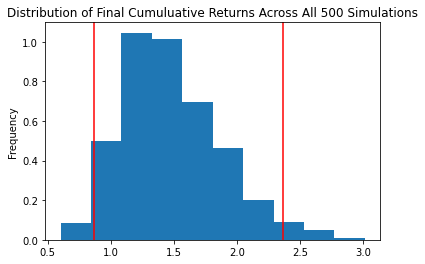

In [360]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [361]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              1.484965
std               0.381953
min               0.602936
25%               1.216950
50%               1.431859
75%               1.733570
max               3.014002
95% CI Lower      0.871417
95% CI Upper      2.366396
Name: 1260, dtype: float64


In [362]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $52285.0 and $141983.78


## Ten Years Retirement Option

In [363]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252*1
)

In [364]:
# Print simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open     high     low   close     volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562.0   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723.0   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

In [365]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001882,0.999384,1.006374,1.007795,0.996824,0.999044,0.994646,1.003104,1.008373,1.007418,...,1.006479,1.004167,1.007812,0.989217,0.988778,1.003193,0.998000,0.985041,1.009497,0.987676
2,1.015406,0.994331,1.013854,1.019520,1.002602,1.001339,0.991369,1.003879,1.004767,1.012681,...,1.004161,1.006107,1.008105,0.994295,0.992406,1.003855,1.010238,0.986850,1.013521,0.985746
3,1.016704,1.003628,1.014697,1.009984,1.003280,0.999588,0.996160,0.994956,1.011844,0.999839,...,1.001814,1.006676,1.006620,0.988669,0.988006,0.995425,1.018064,0.988815,1.016948,0.989064
4,1.023838,0.996299,1.000936,0.999862,0.996975,1.006931,0.999223,0.981334,1.004177,0.987441,...,1.010764,0.995081,1.000869,0.987351,0.987627,1.002764,1.023705,0.976814,1.022460,0.991006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.085206,1.006569,0.968210,0.906104,0.981110,0.967068,0.902948,1.097733,1.146104,0.972557,...,1.017780,1.137597,0.955208,1.052500,1.021660,1.224898,0.902202,1.364226,0.992569,1.022754
249,1.094016,1.004506,0.970414,0.912093,0.977675,0.976858,0.900695,1.085681,1.146059,0.965170,...,1.015968,1.130883,0.957545,1.059868,1.024820,1.218929,0.896586,1.355110,1.000217,1.023943
250,1.081659,1.010118,0.971535,0.913697,0.985255,0.979656,0.902172,1.074979,1.163867,0.948347,...,1.035606,1.129327,0.963362,1.055848,1.022345,1.211004,0.903178,1.348849,1.001969,1.031780
251,1.086906,1.020990,0.973501,0.910701,0.990048,0.970196,0.901343,1.075191,1.157902,0.947438,...,1.038770,1.138133,0.947092,1.053759,1.015005,1.214652,0.895472,1.325566,1.006554,1.030108


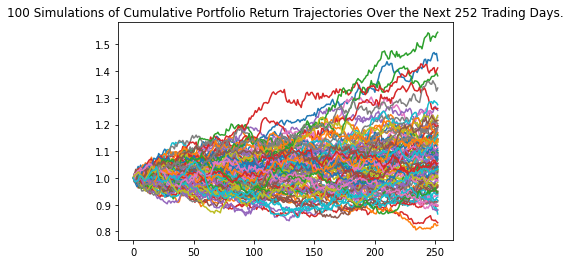

In [366]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

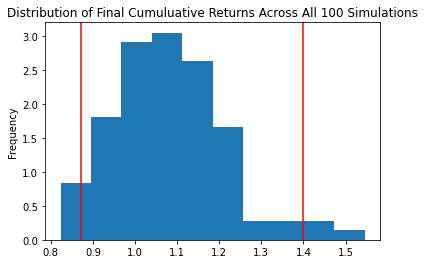

In [367]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [368]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           100.000000
mean              1.080158
std               0.131146
min               0.823002
25%               0.989959
50%               1.071214
75%               1.159150
max               1.545846
95% CI Lower      0.871853
95% CI Upper      1.398110
Name: 252, dtype: float64


In [369]:
# Set initial investment
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]*60000,2)
ci_upper_ten = round(even_tbl[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $52311.16 and $83886.61
